### 第二章：Notes

音乐是由一堆音符组成的，他们一个接一个地排列在一起，还有更多别的东西，如谱号、调号等等。但音乐的核心是音符。因此想要获取音乐的任何信息，都需要知道music21工具包如何定义并使用Notw的


### 创建和使用
标准音符的music21概念包含在`Note`对象中，该对象在note 模块中找到。在note模块中，除了以外还有其他类`note.Note`。最重要的是`note.Rest`，正如您想象的那样，它代表了休息。如果我们使用以下命令加载music21：

In [1]:
from music21 import *

那么您现在只需在任何命令行中键入`note`即可访问该模块 。

In [2]:
note 

<module 'music21.note' from 'd:\\program files\\python\\python35\\lib\\site-packages\\music21\\note.py'>

如果您收到类似上面这样的信息，则说明可以访问模块`note`。d:\\program files ...之后的文件名会有所不同。它将向您显示在哪里安装了music21（如果您忘记在哪里安装了music21，可以通过这种方式找到），只要它以note.pyc或note.py或类似的东西结尾，就可以了。

如果您想知道note除Note和Rest对象之外该模块还包含什么，可以键入` dir(note)`来打印出来：

In [3]:
dir(note)

['GeneralNote',
 'Lyric',
 'LyricException',
 'NotRest',
 'NotRestException',
 'Note',
 'NoteException',
 'Rest',
 'SpacerRest',
 'Test',
 'TestExternal',
 'Unpitched',
 '_DOC_ORDER',
 '_MOD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'base',
 'beam',
 'common',
 'copy',
 'duration',
 'environLocal',
 'environment',
 'exceptions21',
 'expressions',
 'interval',
 'noteheadTypeNames',
 'pitch',
 'stemDirectionNames',
 'style',
 'tie',
 'unittest',
 'volume']

此列表中的大写单词表示内容是注释类–。其他类是我们以后将要讲到的东西，例如 `Lyric`对象。

现在我们已经足够了解这个模块和对象了。让我们创建一个`note.Note`的对象，试试`F5`

In [4]:
f = note.Note("F5")

我们有一个约定：中音do是C4, 高一个八度的是C5，以此类推

现在你有了一个`Note`，这是啥？他现在知识一个存在f里面的对象。可以直接输入`f`进行验证

In [5]:
f

<music21.note.Note F>

我们还可以看到他实际上是处于第五个八度位置的F，可以通过请求`nam`和`octave`对象来进行验证


In [6]:
f.name

'F'

In [7]:
f.octave

5

还有一个属性`pitch`会返回两者的混合结果

In [8]:
f.pitch

<music21.pitch.Pitch F5>

当然，上面告诉你的都是已知的内容！让我们试试输出直接看不出来的信息。其中一些是子属性，也就是属性的属性，需要用两个`.`来访问。比如pitch属性的字书写`frequency`以及`pitchClassString`

In [9]:
print(f.pitch.frequency)
print(f.pitch.pitchClassString)

698.456462866008
5


这看上去好多了！我们现在知道了f的频率是698Hz(当标准音A4 = 440Hz的时候)，以及它处于音调(pitch)的第5位(C = 0,C#/Db = 1,以此类推)

现在我们注意以下几点：
1. 您的frequency数字可能更多，而不是以"..."结尾。我给了我"698.456462866008"。在文档中，有时我们会写"…"，而不是输入所有这些数字（或长字符串）。这部分是节省空间的一种方式，并且还因为计算机的长整数甚至最后几位数的长度会有所不同，具体取决于它是32位还是64位，Mac或PC，去年秋天的黑子数，等等。由于我不知道您使用的是哪台计算机，因此如果结果略有不同，请不要担心。
2. 我们可以观察到`f.name`的输出是有单引号的，这表示他是个字符串，而`f.octave`的输出没有任何别的东西，说明他返回的是一个数字。在pthon中，字符串和数字的区别是很大的。对于返回字符串的`f.pitch.pitchClassString`，我们也单独设置了一个属性`f.pitch.pitchClass`用来返回数字

刚才我们处理的都是像F一样的基本音(nature)，但是对于Bb来说，它的`pitchClass`是10，并且`pitchClassString `是A，这就有很大的不同了。

In [10]:
B = note.Note('Bb')
B.pitch.pitchClassString

'A'

 让我们继续去看Bb是怎么一回事。在`music21`中，升音就是我们所熟知的`#`，而降音则是`-`，因为这很难把`b`和符号`flat`区分开，因此我们将Bb表示成：

In [36]:
bflat = note.Note("B-2")

这里的命名是bflat，当然，你也可以叫Bb或者b_flat，这不重要。

由于刚才我们创建了一个"临时符(accidental)"，我们可以通过`.oath.accidental`子属性来获取

In [12]:
bflat.pitch.accidental

<accidental flat>

accidental的输出结果是一个不是数字也没有引号的内容，这通常意味着返回的是一个对象。对象具有属性以及其他的很多优点，Accidental对象也不例外。因此，让我们创建一个新的变量来存储accidental

In [13]:
acc = bflat.pitch.accidental

我们将详细介绍Accidental对象的所有属性，这是其中两个比较重要的：`.alter`和`.displayLocation`。`.alter`将相当多地被使用，因为它可以显示此Note被Accidental改变了多少个半音 ：

In [14]:
acc.alter

-1.0

由于我们表示的是降音，`.alter`就是一个负数。

注意：它不是整数，而是浮点数，这说明我们可以表示如1/4音之类的东西。

回头看`acc = bflat.pitch.accidental`和`acc.alter`这两个内容。用了个`acc`来存储`bflat.pitch.accidental`，现在我们跳过这一步，直接用一行代码来查看我们需要的信息

In [15]:
bflat.pitch.accidental.alter

-1.0

In [16]:
acc.displayLocation

'normal'

我们可以看到`displayLocation`属性的值是normal，由于acc表示的是bflat的子对象，因此当acc进行改变的时候，bflat的子属性也会跟着改变

In [17]:
bflat.pitch.accidental.displayLocation

'normal'

In [18]:
acc.displayLocation = 'above'
bflat.pitch.accidental.displayLocation

'above'

python的对象可以内置新的成员属性（虽然这样可能会导致对象变得混乱），比如我希望Note对象有`wasWrittenByStockhausen`属性，如果我们直接尝试访问的话，会得到以下错误：

In [19]:
bflat.wasWrittenByStockhausen

AttributeError: 'Note' object has no attribute 'wasWrittenByStockhausen'

但是，如果您设置该怪异属性的值，则可以在以后使用它

In [20]:
bflat.wasWrittenByStockhausen = True
f.wasWrittenByStockhausen = False
if bflat.wasWrittenByStockhausen == True:
    print("Hope you're enjoying Sirius!")

Hope you're enjoying Sirius!


到目前为止，您可能已经厌恶了讨厌的编程，那就让我们看一看或者演奏这些音符。如果您已经安装了MusicXML阅读器，您可以键入`show()`来得到乐谱。

**备注：**如果想在jupyter中显示的话，需要将`subconverters.py`文件中第891行的`os.system(musescoreRun)`改成`subprocess.run(musescoreRun)`，当然，这里还需要再加一句`import subprocess `


Enjoy !

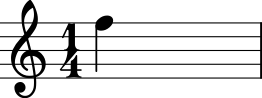

In [22]:
f.show()

在这里，我们将默认音符长度设置为四分音符，接下来我们会介绍更多的音符长度。这里我们也默认定义了一个谱号，以确保这确实是F5

In [23]:
f.show('midi')

`.show()`是`Note`对象上的方法，而`.octave`是一个属性。所有方法后面要加括号，必要的时候要加上参数。例如，让我们通过给Bb再降低3个调，得到音符D

In [37]:
d = bflat.transpose("M3")
d

<music21.note.Note D>

In [38]:
bflat

<music21.note.Note B->

`transpose()`方法会返回一个新的note.Note对象，表示在一定间隔内向上或者向下进行移调的操作。

如果你想同时在transpose的时候也改变自身，只需要在函数内添加`inPlace = True`

In [39]:
bflat.transpose("P4",inPlace=True)
bflat

<music21.note.Note E->

此时原来的数值d并不会发生改变(因为当bflat发生变化之后，他们就不再有内存的关联了)。如果想要回到原来的数值的话，我们对d进行两次降六度。

In [40]:
whatNoteIsThis = d.transpose('dd6')
whatNoteIsThis

<music21.note.Note B--->

这是一个之前没见过的符号，我们检查一下Note的`pitch.accidental.alter`以及`pitch.accidental.name`

In [41]:
whatNoteIsThis.pitch.accidental.alter

-3.0

In [42]:
whatNoteIsThis.pitch.accidental.name

'triple-flat'

最后一件事：不是每一个音符都是`accident`的，比如单个的D就没有它，因此会返回None

In [44]:
print(d.pitch.accidental)

None


这样也会导致`pitch.accidental.name`是空值，为了保证不会出错，我们可以用下面的判断来避免异常抛出

In [46]:
if d.pitch.accidental is not None:
    print(d.pitch.accidental.name)

同理，d也可能没有`.pith`，我们需要做类似的检查。

现在是时候休息一下了，让我们执行Rest

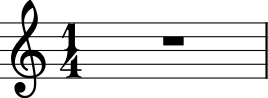

In [48]:
r = note.Rest()
r.show()